# Fine Tune using hyp.VOC.yaml

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

In [ ]:
PROJECT_NAME = "yolov5_train/fine_tune_hyp_voc"
BASE_MODEL = "yolov5m6.pt"
TRAIN_BATCH = 16
TRAIN_EPOCHS = 100
VAL_BATCH = 64

>lr0: 0.00334

>lrf: 0.15135

>momentum: 0.74832

>weight_decay: 0.00025

>warmup_epochs: 3.3835

>warmup_momentum: 0.59462

>warmup_bias_lr: 0.18657

>box: 0.02

>cls: 0.21638

>cls_pw: 0.5

>obj: 0.51728

>obj_pw: 0.67198

>iou_t: 0.2

>anchor_t: 3.3744

>fl_gamma: 0.0

>hsv_h: 0.01041

>hsv_s: 0.54703

>hsv_v: 0.27739

>degrees: 0.0

>translate: 0.04591

>scale: 0.75544

>shear: 0.0

>perspective: 0.0

>flipud: 0.0

>fliplr: 0.5

>mosaic: 0.85834

>mixup: 0.04266

>copy_paste: 0.0

>anchors: 3.412

# Train

In [ ]:
#FINE TUNING:
WEIGHTS_BEST = f"{PROJECT_NAME}/feature_extraction/weights/best.pt"
!python3.10 yolov5/train.py --hyp 'yolov5/data/hyps/hyp.VOC.yaml' --batch $TRAIN_BATCH --epochs $TRAIN_EPOCHS --data 'data.yaml' --weights $WEIGHTS_BEST --project $PROJECT_NAME --name 'fine-tuning' --cache

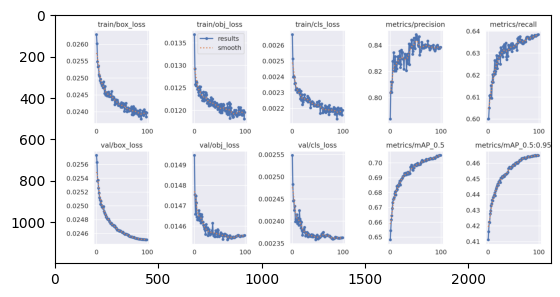

In [6]:
img = mpimg.imread('yolov5_train/fine_tune_hyp_voc/fine-tuning/results.png')
imgplot = plt.imshow(img)
plt.show()

# Validation

In [8]:
WEIGHTS_BEST = "yolov5_train/fine_tune_hyp_voc/fine-tuning/weights/best.pt"
PROJECT_NAME = "yolov5_train/fine_tune_hyp_voc"
!python3.10 yolov5/val.py --weights $WEIGHTS_BEST --batch 64 --data 'data.yaml' --task test --project $PROJECT_NAME --name 'validation_on_test_data' --augment

val: data=/home/zkhan1/YOLOv5_FOSOCO_Dataset/yolov5/data/data.yaml, weights=['yolov5_train/fine_tune_hyp_voc/fine-tuning/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5_train/fine_tune_hyp_voc, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 276 layers, 35272008 parameters, 0 gradients, 48.9 GFLOPs
test: Scanning /home/zkhan1/YOLOv5_FOSOCO_Dataset/yolov5/data/test/labels.cache.
                 Class     Images  Instances          P          R      mAP50   
                   all        348       7174      0.766      0.627      0.686      0.441
             blue_cone        348       2851      0.813      0.663      0.717      0.463
 

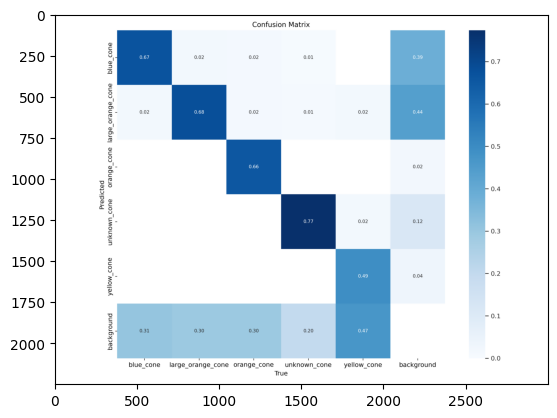

In [9]:
img = mpimg.imread('yolov5_train/fine_tune_hyp_voc/validation_on_test_data/confusion_matrix.png')
imgplot = plt.imshow(img)
plt.show()

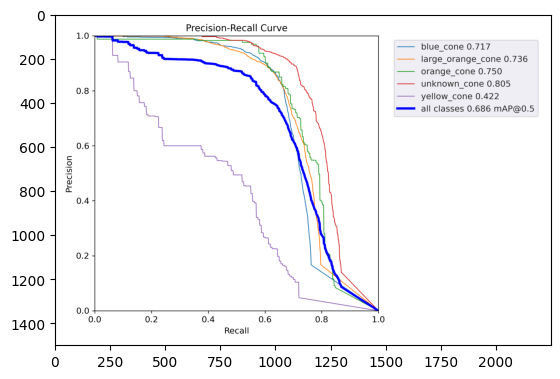

In [10]:
img = mpimg.imread('yolov5_train/fine_tune_hyp_voc/validation_on_test_data/PR_curve.png')
imgplot = plt.imshow(img)
plt.show()

# Test

In [11]:
WEIGHTS_BEST = "yolov5_train/fine_tune_hyp_voc/fine-tuning/weights/best.pt"
PROJECT_NAME = "yolov5_train/fine_tune_hyp_voc"
!python3.10 yolov5/detect.py --weights $WEIGHTS_BEST  --conf 0.6 --source 'yolov5/data/test/images' --project $PROJECT_NAME --name 'detect_test' --augment --line=3

detect: weights=['yolov5_train/fine_tune_hyp_voc/fine-tuning/weights/best.pt'], source=yolov5/data/test/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=True, visualize=False, update=False, project=yolov5_train/fine_tune_hyp_voc, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 276 layers, 35272008 parameters, 0 gradients, 48.9 GFLOPs
image 1/348 /home/zkhan1/YOLOv5_FOSOCO_Dataset/yolov5/data/test/images/BME_00027.jpg: 256x640 9 blue_cones, 6 large_orange_cones, 281.3ms
image 2/348 /home/zkhan1/YOLOv5_FOSOCO_Dataset/yolov5/data/test/images/BME_00081.jpg: 256x640 6 blue_cones, 11 larg